In this notebook, we'll solve a system of two ODEs both numerically and analytically, noting how the solutions depend on the eigenvalues of the dynamics matrix. The dynamical equations are
$$
\frac{d\vec{x}}{dt} = \mathbf{A} \vec{x},
$$
and we assume that we are given the initial condition $\vec{x}(0)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, we can define the dynamics matrix $\mathbf{A}$ and compute the eigenvalues:

In [63]:
A = np.array([[-1, 1],
              [2, -3]])

evals, evecs = np.linalg.eig(A)
print('Evals: ', evals)

# Period of oscillations if evals are complex:
if np.imag(evals[0]) != 0:
    print('Period of oscillations: ', 2 * np.pi / np.imag(evals[0]))

# Check that T (the matrix of eigenvectors) diagonalizes A:
T = evecs
print('Diagonalized dynamics matrix: ', np.linalg.inv(T) @ A @ T)



Evals:  [-0.26794919 -3.73205081]
Diagonalized dynamics matrix:  [[-2.67949192e-01  6.93889390e-17]
 [-2.22044605e-16 -3.73205081e+00]]


Next, we can solve the ODEs numerically using Euler integration:

Text(0.5, 1.0, 'Numerical solution')

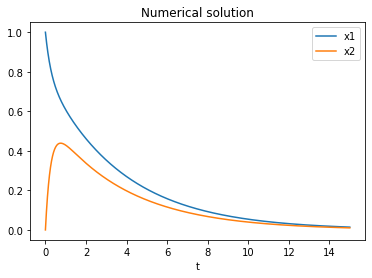

In [29]:
dt = 0.01
t_max = 15
n_timesteps = int(t_max / dt)
t_range = np.linspace(0, t_max, n_timesteps)

# Solve the ODE numerically with Euler integration:
x = np.zeros((n_timesteps, 2))
x[0,:] = [1, 0]
for n in range(n_timesteps-1):
    x[n+1,:] = x[n,:] + dt * A @ x[n,:]
    
plt.plot(t_range, x[:,0])
plt.plot(t_range, x[:,1])
plt.legend(['x1', 'x2'])
plt.xlabel('t')
plt.title('Numerical solution')

**Exercise**: Compute the analytic solution $\vec{x}(t) = e^{\mathbf{A} t} \vec{x}(0)$. Plot the result and compare it with the numerical solution computed above.

In [1]:
from scipy.linalg import expm  # This function takes the matrix exponential

## Solution ##



**Exercise**: Plot the solution as a trajectory in state space, together with the eigenvectors.

In [2]:
## Solution ##



**Exercise**: Recall from class that we can project $x$ onto the eigenvectors of $\mathbf{A}$ by defining $\vec{z}(t) = \mathbf{T} \vec{x}(t)$. Plot the projections $z_{1,2}(t)$ as functions of time. Also plot them in 

In [3]:
## Solution ##

